# Import Libraries

In [106]:
import numpy as np
import pandas as pd
import sklearn.datasets
import pandas_profiling
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics

# Import the Dataset

In [22]:
breast_cancer = sklearn.datasets.load_breast_cancer()

In [25]:
df = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)
df['class'] = breast_cancer.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

# Pandas Profiling

In [121]:
report = pandas_profiling.ProfileReport(df)


# Data Audit 

In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [31]:
df['class'].value_counts() # 1 - malignant , 0 - benign

1    357
0    212
Name: class, dtype: int64

In [32]:
df.groupby('class').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


> We know that, if the patients has cancer, then all the cell size is small

# train test Split

In [40]:
x = df[df.columns.difference(['class'])]
y = df['class']

In [44]:
print(x.shape, y.shape)

(569, 30) (569,)


In [46]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.1, stratify = y, random_state = 123)

In [49]:
print(x.shape,x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(569, 30) (512, 30) (512,) (57, 30) (57,)


In [50]:
# Check whether it is stratified sampled
print(y.mean(), y_train.mean(), y_test.mean())

0.6274165202108963 0.626953125 0.631578947368421


> We know that maligant(1 - patient have cancer) present in the complete data is 62%

> For Mp neuron model, we need to do binarization(0 and 1) for all the x-variables

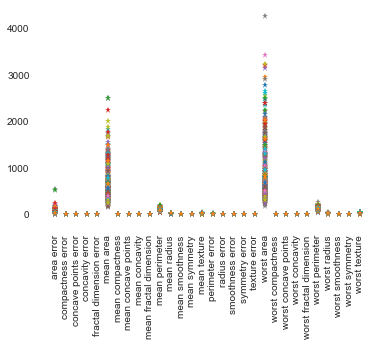

In [55]:
plt.plot(x_train.T, '*')
plt.xticks(rotation = 'vertical')
plt.show()

In [63]:
binary_temp = x_train['mean area'].map(lambda x: 0 if x<1000 else 1)

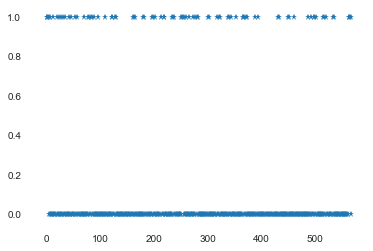

In [80]:
plt.plot(binary_temp, '*')
plt.show()

> We should do binarization individually to understand the model better, But we can automate as well to do the binarization process for all x-variables|


In [73]:
x_binarized_train = x_train.apply(pd.cut, bins = 2, labels=[0,1])
x_binarized_test = x_test.apply(pd.cut, bins = 2, labels=[0,1])

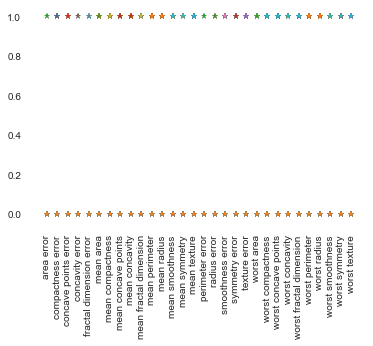

In [79]:
plt.plot(x_binarized_train.T, '*')
plt.xticks(rotation = 'vertical')
plt.show()

In [81]:
type(x_binarized_train)

pandas.core.frame.DataFrame

> The important thing is We need to change the x variable type from dataframe to numpy array

In [83]:
x_binarized_train = x_binarized_train.values
x_binarized_test = x_binarized_test.values

In [84]:
type(x_binarized_train)

numpy.ndarray

# Model Building

In [90]:
for b in range(0,x_binarized_train.shape[1]+1):
    y_pred_train = []
    accurate_rows = 0
    for x,y in zip(x_binarized_train, y_train):
        y_pred = (np.sum(x)>=b)
        y_pred_train.append(y_pred)
        accurate_rows += (y_pred == y)
    print(b, accurate_rows/x_binarized_train.shape[0])        

0 0.626953125
1 0.26171875
2 0.189453125
3 0.158203125
4 0.1484375
5 0.166015625
6 0.197265625
7 0.23046875
8 0.263671875
9 0.28515625
10 0.3046875
11 0.32421875
12 0.33203125
13 0.337890625
14 0.345703125
15 0.353515625
16 0.36328125
17 0.3671875
18 0.37109375
19 0.373046875
20 0.373046875
21 0.373046875
22 0.373046875
23 0.373046875
24 0.373046875
25 0.373046875
26 0.373046875
27 0.373046875
28 0.373046875
29 0.373046875
30 0.373046875


> We found that, our base model is giving 62% accuracy and others giving very low, we need to check the data preprocessing steps

In [92]:
df.groupby(['class']).mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


> Yeah, we got to know that, if the patient has breast cancer then the size of the cells are low, We remember that we have applied, if the value is high then label it as 1(malignant-cancer) others 0(benign - no cancer).

In [93]:
x_binarized_train = x_train.apply(pd.cut, bins = 2, labels=[1,0])
x_binarized_test = x_test.apply(pd.cut, bins = 2, labels=[1,0])

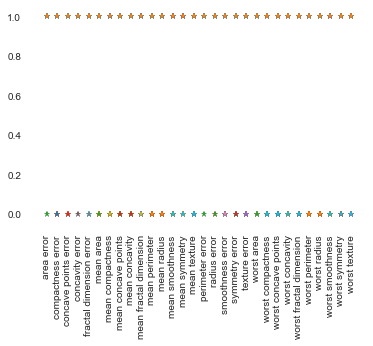

In [94]:
plt.plot(x_binarized_train.T, '*')
plt.xticks(rotation = 'vertical')
plt.show()

In [95]:
type(x_binarized_train)

pandas.core.frame.DataFrame

> The important thing is We need to change the x variable type from dataframe to numpy array

In [96]:
x_binarized_train = x_binarized_train.values
x_binarized_test = x_binarized_test.values

In [97]:
type(x_binarized_train)

numpy.ndarray

# Model Building - Phase 2

In [105]:
for b in range(0, x_binarized_train.shape[1]+1):
    y_pred_train = []
    accurate_rows = 0
    for x,y in zip(x_binarized_train, y_train):
        y_pred = np.sum(x) >= b
        y_pred_train.append(y_pred)
        accurate_rows += (y == y_pred)
    print(b, accurate_rows/x_binarized_train.shape[0])

0 0.626953125
1 0.626953125
2 0.626953125
3 0.626953125
4 0.626953125
5 0.626953125
6 0.626953125
7 0.626953125
8 0.626953125
9 0.626953125
10 0.626953125
11 0.626953125
12 0.626953125
13 0.62890625
14 0.6328125
15 0.63671875
16 0.646484375
17 0.654296875
18 0.662109375
19 0.66796875
20 0.67578125
21 0.6953125
22 0.71484375
23 0.736328125
24 0.76953125
25 0.802734375
26 0.833984375
27 0.8515625
28 0.841796875
29 0.810546875
30 0.73828125


> Now we got the good accuracy, When b = 27 we got high accuracy as 85%

In [110]:
b = 27
y_pred_test = []
for x in x_binarized_test:
    y_pred = np.sum(x) >= b
    y_pred_test.append(y_pred)
    
accuracy = metrics.accuracy_score(y_test, y_pred_test)
print(accuracy)   

0.8771929824561403


> We got 87% Accuracy in test dataset

# Lets create class for MP Neuron

In [115]:
class MPNeuron:
    def __init__(self):
        self.b = None
        
    def model(self,x):
        return np.sum(x)>= self.b
    
    def predict(self,x):
        y = []
        for row in x:
            res = self.model(row) 
            y.append(res)
        return np.array(y)
    
    def fit(self, x, y):
        accuracy = {}
        
        for b in range(x.shape[1]+1):
            self.b = b
            y_pred = self.predict(x)
            accuracy[b] = metrics.accuracy_score(y, y_pred)
            
        best_b = max(accuracy, key = accuracy.get)
        self.b = best_b
        
        print('The Optimal b value is : ', best_b)
        print('The best accuracy is : ', accuracy[best_b])        

In [116]:
mp_model = MPNeuron()
mp_model.fit(x_binarized_train, y_train)

The Optimal b value is :  27
The best accuracy is :  0.8515625


In [118]:
predicted = mp_model.predict(x_binarized_test)

In [119]:
metrics.accuracy_score(y_test, predicted)

0.8771929824561403